In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [90]:
df = pd.read_csv('transactions.csv')
df

,client_id,datetime,code,type,sum
0,96372458,6:33:15,6011,2010,-561478.94
1,24567813,17:20:40,6011,7010,67377.47
2,21717441,13:38:47,6011,2010,-44918.32
3,14331004,12:57:08,6011,2010,-3368873.66
4,85302434,10:34:12,4814,1030,-3368.87
...,...,...,...,...,...
130034,15836839,11:50:53,5411,1010,-26344.59
130035,28369355,11:59:34,4829,2330,-24705.07
130036,40949707,21:13:58,5411,1110,-40353.72
130037,7174462,13:58:14,5411,1010,-25536.06


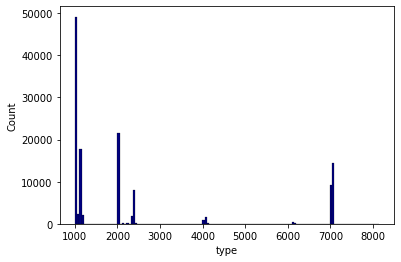

In [30]:
sns.histplot(data=df
            ,x='type'
            ,color = 'navy'
            ,alpha = 1
             )

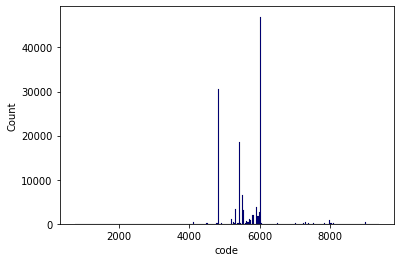

In [31]:
sns.histplot(data=df
            ,x='code'
            ,color = 'navy'
            ,alpha = 1
             )

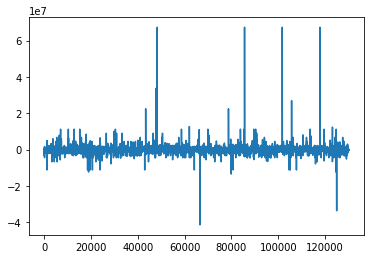

In [32]:
plt.plot(df['sum'])
plt.show() 

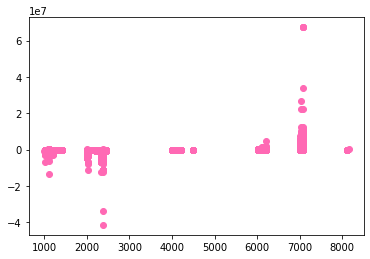

In [33]:
plt.scatter(df['type'], df['sum'], color = 'hotpink')
plt.show()


In [34]:
#analyzing
df.dtypes

client_id      int64
datetime      object
code           int64
type           int64
sum          float64
dtype: object

In [35]:
df.columns

Index(['client_id', 'datetime', 'code', 'type', 'sum'], dtype='object')

In [36]:
df.shape

(130039, 5)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130039 entries, 0 to 130038
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   client_id  130039 non-null  int64  
 1   datetime   130039 non-null  object 
 2   code       130039 non-null  int64  
 3   type       130039 non-null  int64  
 4   sum        130039 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 5.0+ MB


In [53]:
df.describe()

,client_id,code,type,sum
count,1.300390e+05,130039.000000,130039.000000,1.300390e+05
mean,5.086859e+07,5594.629996,2489.372135,-1.812909e+04
std,2.872854e+07,606.087084,2253.296578,5.584445e+05
min,2.289900e+04,742.000000,1000.000000,-4.150030e+07
25%,2.577174e+07,5211.000000,1030.000000,-2.244916e+04
50%,5.235837e+07,5641.000000,1110.000000,-5.502490e+03
75%,7.506302e+07,6010.000000,2370.000000,-1.122960e+03
max,9.999968e+07,9402.000000,8145.000000,6.737747e+07


In [54]:
#droping the rows with null values of columns
df = df.dropna(subset=["type"])
df = df.dropna(subset=["sum"])
df = df.dropna(subset=["code"])
df = df.dropna(subset=["datetime"])
df

,client_id,datetime,code,type,sum
0,96372458,6:33:15,6011,2010,-561478.94
1,24567813,17:20:40,6011,7010,67377.47
2,21717441,13:38:47,6011,2010,-44918.32
3,14331004,12:57:08,6011,2010,-3368873.66
4,85302434,10:34:12,4814,1030,-3368.87
...,...,...,...,...,...
130034,15836839,11:50:53,5411,1010,-26344.59
130035,28369355,11:59:34,4829,2330,-24705.07
130036,40949707,21:13:58,5411,1110,-40353.72
130037,7174462,13:58:14,5411,1010,-25536.06


In [55]:
#droping the rows with reapated values
df.drop_duplicates(keep=False, inplace=False)

,client_id,datetime,code,type,sum
0,96372458,6:33:15,6011,2010,-561478.94
1,24567813,17:20:40,6011,7010,67377.47
2,21717441,13:38:47,6011,2010,-44918.32
3,14331004,12:57:08,6011,2010,-3368873.66
4,85302434,10:34:12,4814,1030,-3368.87
...,...,...,...,...,...
130034,15836839,11:50:53,5411,1010,-26344.59
130035,28369355,11:59:34,4829,2330,-24705.07
130036,40949707,21:13:58,5411,1110,-40353.72
130037,7174462,13:58:14,5411,1010,-25536.06


In [56]:
#last check
df.isnull().sum()

client_id    0
datetime     0
code         0
type         0
sum          0
dtype: int64

In [67]:
#the total sum of column 'sum'
print("The total sum:", df['sum'].sum())

#minimum
print("The minimum:", df['sum'].min())
#maximum
print("The maximum:", df['sum'].max())

#average sum
print("\nThe average sum:", round(df['sum'].sum()/len(df['sum']), 2))


The total sum: -2357489240.77
The minimum: -41500301.14
The maximum: 67377473.16

The average sum: -18129.09


In [73]:
#cluster
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [74]:
features, true_labels = make_blobs(
    n_samples=200,
    centers=3,
    cluster_std=2.75,
    random_state=42
)

In [85]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
)

kmeans.fit(scaled_features)
kmeans.inertia_ = df['sum'].min()

# The lowest sum value
print("The lowest sum value:", kmeans.inertia_, "\n")

# Final locations of the centroid
print("Final locations of the centroid:\n", kmeans.cluster_centers_, "\n")

# The number of iterations required to converge
print("The number of iterations required to converge:", kmeans.n_iter_)


The lowest sum value: -41500301.14 

Final locations of the centroid:
 [[-0.25813925  1.05589975]
 [-0.91941183 -1.18551732]
 [ 1.19539276  0.13158148]] 

The number of iterations required to converge: 2


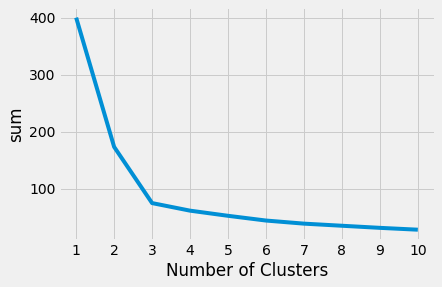

In [84]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the sum values for each k
sum = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sum.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sum)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("sum")
plt.show()

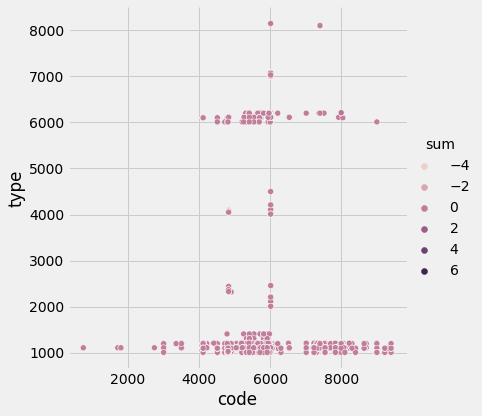

In [87]:
#visualization
sns.relplot(
    x="code", y="type", hue="sum", data=df, height=6,
);